1. [Auto Scaling Groups](#Auto-Scaling-Groups)
2. [ASG attributes](#ASG-attributes)
3. [ASG Based scaling - CloudWatch](#ASG-Based-scaling---CloudWatch)
4. [Setup Auto Scaling Group](#Setup-Auto-Scaling-Group)
5. [To Check ASG after creation](#To-Check-ASG-after-creation)
6. [Auto Scaling Policies](#Auto-Scaling-Policies)
7. [Metrics used for Scaling](#Metrics-used-for-Scaling)
8. [ASG - Scaling cool down](#ASG---Scaling-cool-down)
9. [Setup Automatic Scaling using Scaling Policy](#Setup-Automatic-Scaling-using-Scaling-Policy)
10. [Example of Scaling Policy](#Example-of-Scaling-Policy)
11. [ASG - Instance Refresh (Updating EC2 instance)](#ASG---Instance-Refresh-(Updating-EC2-instance))

#### Auto Scaling Groups:
- manages the EC2 instances especially in load balancing
- can be used to scale up or down based on demand or load
- recreate new EC2 instances if existing EC2 is unhealthy or terminated
- Its has minimum, desired and maximum capacity for EC2 instances to scale out and in


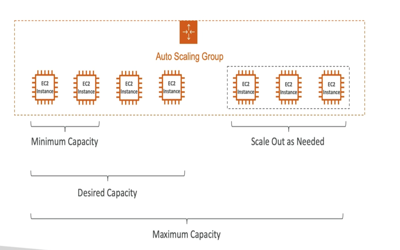

In [1]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/asg5.jpeg')
new_image = img.resize((400, 250))
display(new_image)

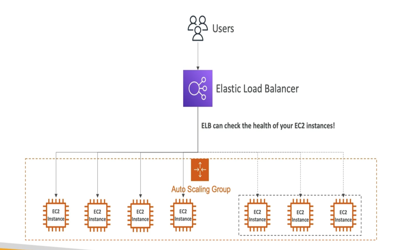

In [2]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/ASG2.jpeg')
new_image = img.resize((400, 250))
display(new_image)

#### ASG attributes:
- Launch Template
    - AMI + instance type
    - EC2 User Data
    - EBS Volumes
    - IAM Roles
    - SSH Key Pair
    - Network + Subnet Information
    - Security Groups
    - Load Balancer Information
- Scaling Policy
    - Min Size / Max Size / Initial Capacity

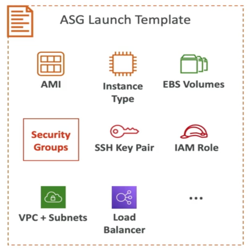

In [3]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/ASG3.jpeg')
new_image = img.resize((250, 250))
display(new_image)

#### ASG Based scaling - CloudWatch:
- an alarm monitors the metric (Average CPU or a custom metric)
- Average CPU metrics is computed for all EC2 instance together
- Based on alarms:
    - scale in
    - scale out

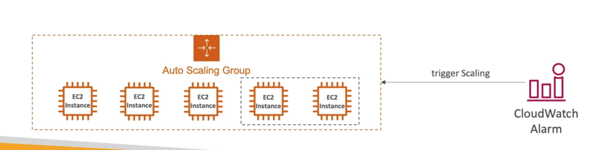

In [4]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/ASG4.jpeg')
new_image = img.resize((600, 150))
display(new_image)

#### Setup Auto Scaling Group:
- Under EC2 console, on the left side choose Auto Scaling Group option
- Click on "Create Auto Scaling Group"
    - name
    - create Launch Template
        - name
        - description
        - AMI
        - instance type
        - Key Pair
        - Network Settings
            - Security Group
        - EBS Volume
        - IAM Role
        - User Data
    - select Launch Template
    - Next
    - Instance launch option
        - VPC
        - AZs (select all)
        - instance requirement
            - override launch template (if necessary)
    - Next
    - Load Balancing
        - No LB
        - Existing LB
        - new LB
        - Attach from LB Target Groups
        - Health Checks
    - Next
    - Group Size
        - Min Capacity
        - Max Capacity
        - Desired Capacity
        - Scaling Policy
        - Scale-in protection
    - Add Notification
    - Next
    - Tags
    - Next
    - Review
    - Create ASG


#### To Check ASG after creation:
- Go to ASG created
- Click Activity tab and check the status under Activity History
- Click Instance management tab, to check the instances and lifecycle hooks
    - Lifecycle hooks
        - https://docs.aws.amazon.com/autoscaling/ec2/userguide/lifecycle-hooks.html

#### Auto Scaling Policies:
- Dynamic Scaling
    - Target Tracking Scaling
        - simple to implement
        - eg: Average CPU utilization above 40%
    - Step Scaling
        - cloudwatch alarm trigger the scale in and out of EC2 instances
    - Simple Scaling
- Scheduled Scaling
    - based on usage patterns
    - eg: scale up during peak hours (min capacity from 5pm - 10 pm)
- Predictive Scaling
    - based on forecast

#### Metrics used for Scaling:
- CPU utilization
- Request count per Target
- Average Network In/Out
- custom metric

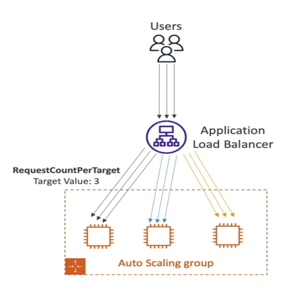

In [5]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/metrics.jpeg')
new_image = img.resize((300, 300))
display(new_image)

#### ASG - Scaling cool down:
- After scaling activity, we have cool down period (default = 300 secs)
- During cool down, ASG will not terminate or add new instances (allow metrics to stabilize)

Advice:
- Use ready-to-use AMIs, to reduce configuration time in order to be serving requests faster and reduce the cool down period

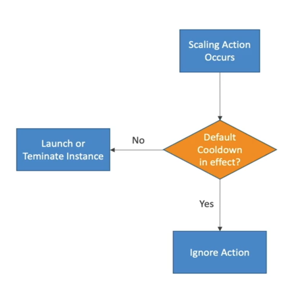

In [6]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/cooldown.jpeg')
new_image = img.resize((300, 300))
display(new_image)

#### Setup Automatic Scaling using Scaling Policy:
- Go Auto Scaling console in EC2
- Select the Auto Scaling group
    - Go to Automatic Scaling
        - Dynamic Scaling
            - Create
                - Policy type
                    - Simple 
                        - name
                        - cloudwatch alarm
                            - create alarm
                        - Action -> Add / Remove / Set to instances
                        - wait time for another scaling activity to happen (if necessary)
                        - Create
                    - Step 
                        - similar as simple scaling
                    - Target tracking
                        - name
                        - metric type
                        - target value
                        - no. of instance needed
                        - Option to limit only scale-in and not scale out
                        - Create
        
        - Predictive Scaling
            - Create
                - Enable Scale based on forecast
                - metrics and target utilization
                - prelaunch settings
                - 
        - Scheduled Scaling
            - Create
                - name
                - min / max / desired capacity
                - start time
                - end time
                - recurrence
                - time zone

#### Example of Scaling Policy:
- Create a Target Scaling Policy (Dynamic)
- Edit the capacity from Details tab in Auto Scaling Group Min - 1 / Max - 3 / Desired - 1
- From monitoring tab, used to check the performance of EC2 metrics
    - Auto Scaling
    - EC2
- To Stress the ASG,
    - Download and Install AWS Stress in Linux 2
        - ```sudo amazon-linux-extras install epel -y```
        - ```sudo yum install stress -y```
        - ```stress -c 4``` -> stress with 4 cpus
- Now the ASG will increase the no. of EC2 instances
- Check cloudwatch alarms for the alarm in red trigger the ASG for scale out

#### ASG - Instance Refresh (Updating EC2 instance):
- Update launch template and recreate all EC2 instances
- Set min health percentage
- Specify warm-up time (how long until the instance is ready to use)

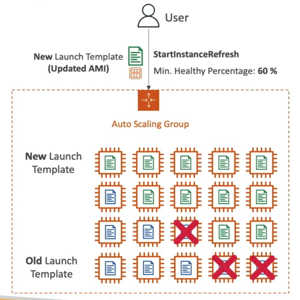

In [7]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/instancerefresh.jpeg')
new_image = img.resize((300, 300))
display(new_image)

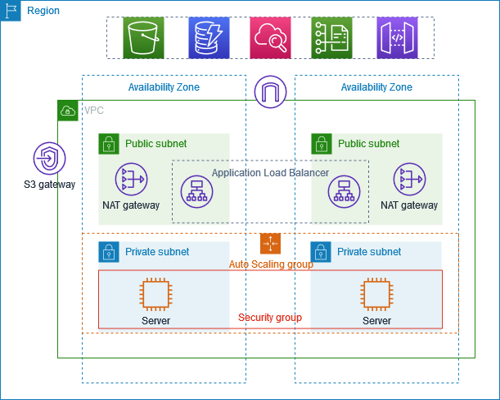

In [8]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/overall.jpeg')
new_image = img.resize((500, 400))
display(new_image)